In [13]:
%load_ext autoreload
%autoreload 2
import sys, os
sys.path.append('../')
import util
import dinuc_shuffle
import shutil
import pandas as pd
import pysam
import kipoiseq
import pybedtools
import numpy as np
import seaborn as sns


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
regulon = pd.read_csv('/gstore/home/toneyans/regulon.csv')
fasta_extractor = util.FastaStringExtractor('../../genomes/hg38.fa')


In [4]:
gata = pybedtools.BedTool('./gata6.csv')
nkx = pybedtools.BedTool('nkx.csv')
c1 = pybedtools.BedTool('/gstore/project/lineage/shush/CBP_Epiregulon/training_data/peaks/C1_peaks.bed')
c3 = pybedtools.BedTool('/gstore/project/lineage/shush/CBP_Epiregulon/training_data/peaks/C3_peaks.bed')


In [6]:
intersects = {}
intersects['gata_and_c1'] = intersect_beds(gata, c1)

In [7]:
intersects['nkx_and_c1'] = intersect_beds(nkx, c1)

In [8]:
intersects['nkx_and_c3'] = intersect_beds(nkx, c3)
intersects['gata_and_c3'] = intersect_beds(gata, c3)

In [18]:
model_path = '../doubletRemoved_models/C3_chrombpnet_nobias.h5'
for label, df in intersects.items():
    results = util.perturb_seqs(df, model_path, fasta_extractor, 2114, 'dinuc', f'../results/{label}')


N rows = 2703


2703it [03:26, 13.10it/s]


N rows = 3403


3403it [04:45, 11.93it/s]


N rows = 4985


4985it [07:07, 11.66it/s]


N rows = 1776


1776it [03:00,  9.82it/s]


In [11]:
result_summaries_list = []
output = 'count'
model = 'C1'
for tf in intersects.keys():
    results = util.dict_load(f'../results/{tf}_model_{model}_chrombpnet_nobias_10_dinuc.pickle')
    for perturb in ['wt', 'dishuffled']:

        vals = results[f'{perturb}_{output}']
        df = pd.DataFrame({'value': vals})
        df['TF'] = tf
        df['model'] = model
        df['output'] = output
        df['perturb'] = perturb
        df = df.reset_index()
        result_summaries_list.append(df)
result_summaries = pd.concat(result_summaries_list)

<Axes: xlabel='TF', ylabel='value'>

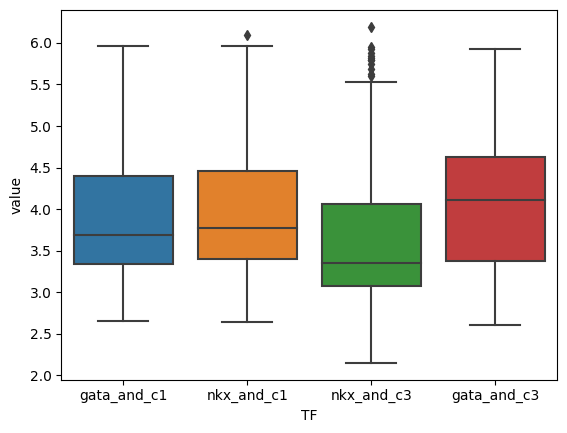

In [16]:
sns.boxplot(data=result_summaries[result_summaries['perturb']=='wt'], x='TF', y='value')

<Axes: xlabel='TF', ylabel='value'>

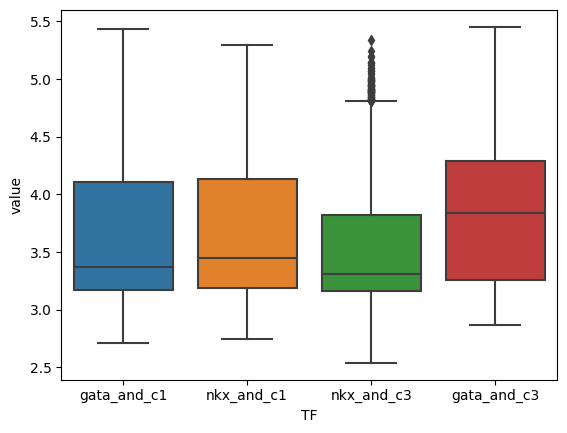

In [17]:
sns.boxplot(data=result_summaries[result_summaries['perturb']=='dishuffled'], x='TF', y='value')